In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Average (Mean) ##

In [2]:
values = make_array(2, 3, 3, 9)

In [3]:
sum(values)/len(values)

4.25

In [4]:
np.average(values)

4.25

In [5]:
np.mean(values)

4.25

In [6]:
(2 + 3 + 3 + 9)/4

4.25

In [7]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [8]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


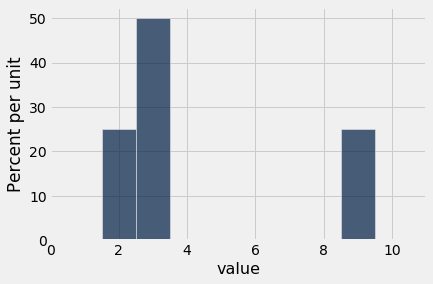

In [9]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [10]:
twos = 2 * np.ones(10)
threes = 3 * np.ones(20)
nines = 9 * np.ones(10)

In [11]:
new_vals = np.append(np.append(twos, threes), nines)

In [12]:
len(new_vals)

40

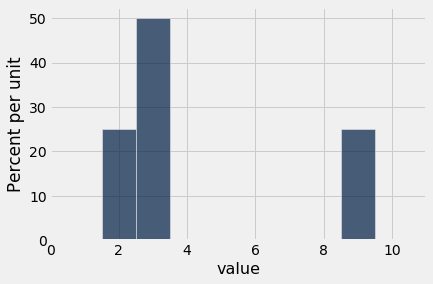

In [13]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

 if two collections have the same distribution, then they have the same mean:

In [14]:
np.average(values)

4.25

In [15]:
np.average(new_vals)

4.25

Proportions are Means:

In [16]:
zero_one = make_array(1, 1, 1, 0)
np.mean(zero_one)

0.75

In [17]:
np.mean(make_array(True, True, True, False))

0.75

Comparing Mean and Median: If the distribution is symmetric about a value, then that value is both the average and the median.If the histogram is skewed, then the mean is pulled away from the median in the direction of the tail:

In [18]:
symmetric = make_array(2, 3, 3, 4)

In [19]:
np.mean(symmetric)

3.0

In [20]:
percentile(50, symmetric)

3

In [21]:
nba = Table.read_table('nba2013.csv')

In [22]:
nba.labels

('Name', 'Position', 'Height', 'Weight', 'Age in 2013')

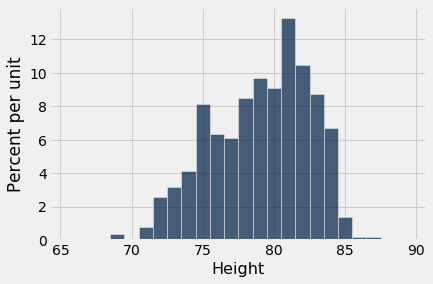

In [23]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [24]:
heights = nba.column('Height')
percentile(50, heights)

80

In [25]:
np.average(heights)

79.06534653465347

## Variance & Standard Deviation ##

In [26]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [27]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [28]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [29]:
sum(deviations)

0.0

In [30]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [31]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [32]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [33]:
np.std(values)

2.7726341266023544

In [34]:
nba = Table.read_table('nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


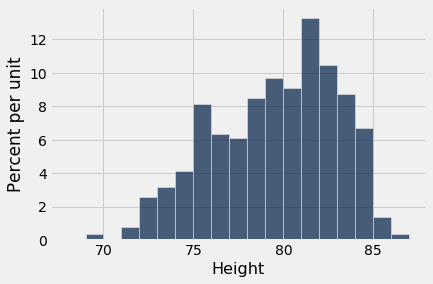

In [35]:
nba.select('Height').hist(bins=np.arange(68, 88, 1))

In [36]:
mean_height = np.mean(nba.column('Height'))
mean_height

79.06534653465347

In [37]:
sd_height = np.std(nba.column('Height'))
sd_height

3.4505971830275546

In [38]:
nba.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Tyson Chandler,Center,85,235,30


The center Hasheem Thabeet of is the tallest player at a height of 87 inches. Thabeet was about 8 inches above the average height:

In [39]:
87 - mean_height

7.934653465346528

That’s a deviation from average, and it is about 2.3 times the standard deviation:

In [40]:
(87 - mean_height)/sd_height

2.2995015194397923

In [41]:
nba.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [42]:
(69 - mean_height)/sd_height

-2.9169868288775844

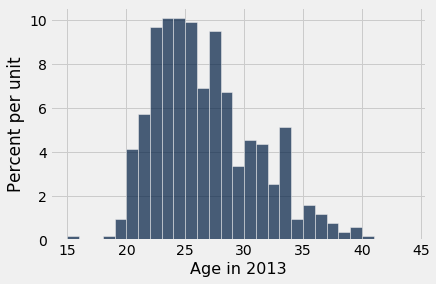

In [43]:
nba.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [44]:
ages = nba.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)